In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerias instaladas")

# Ejemplo simple ¿Cuanto gané o perdí?
print("Calculo manual de retornos")
print("=" * 60)

# Imaginemos que compramos una accion
precio_ayer = 100
precio_hoy = 110

# ¿Cuanto gané?
ganancia_dolares = precio_hoy - precio_ayer
ganancia_porcentaje = (ganancia_dolares / precio_ayer) * 100

print(f"Precio hoy: {precio_hoy}")
print(f"Precio ayer: {precio_ayer}")
print(f"Ganancia en dolares: {ganancia_dolares}")
print(f"Ganancia en porcentaje: {ganancia_porcentaje} %")

Librerias instaladas
Calculo manual de retornos
Precio hoy: 110
Precio ayer: 100
Ganancia en dolares: 10
Ganancia en porcentaje: 10.0 %


Librerias instaladas

 Retorno con datos reales

 Descargando datos


/tmp/ipython-input-1311148181.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download("AAPL", period="1mo", progress=False)



 Ver los 5 primeros datos
Price            Close
Ticker            AAPL
Date                  
2025-09-25  256.869995
2025-09-26  255.460007
2025-09-29  254.429993
2025-09-30  254.630005
2025-10-01  255.449997

 Ver los retornos diaros en %
Price            Close Retorno_Diario
Ticker            AAPL               
Date                                 
2025-09-25  256.869995            NaN
2025-09-26  255.460007      -0.548911
2025-09-29  254.429993      -0.403200
2025-09-30  254.630005       0.078612
2025-10-01  255.449997       0.322033


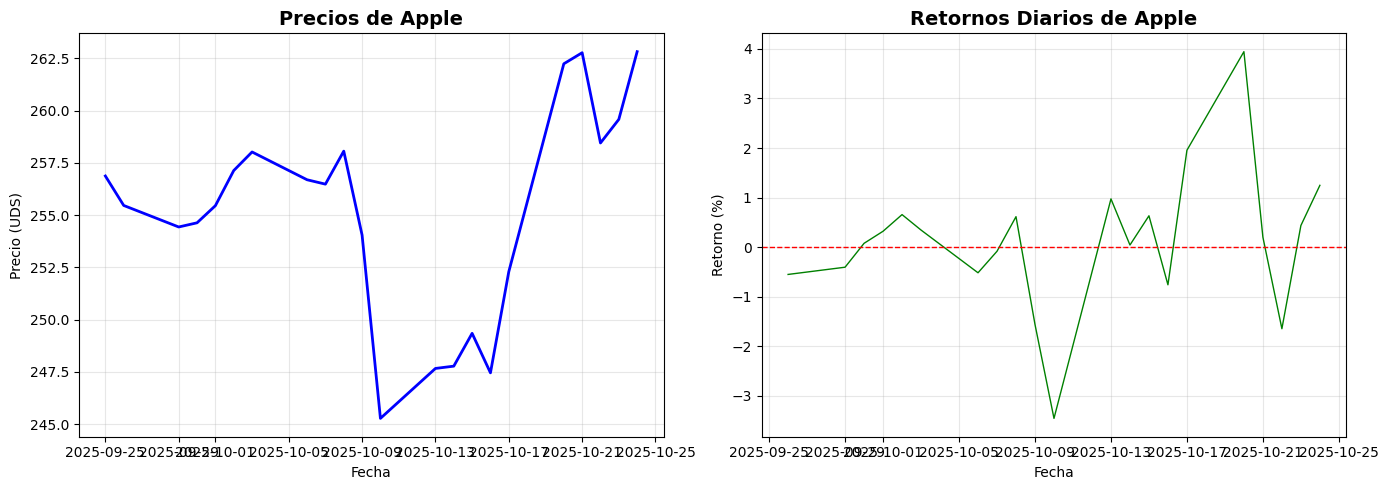


 Retorno promedio: 0.12%
Mejor dia: 3.94%
Peor dia: -3.45%


 Si hubiera invertido: 1000
 En el mejor dia habria ganado: $39.44
 En el peor dia habria perdido: $-34.52


In [2]:
!pip install yfinance -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

print("Librerias instaladas")

# Ejemplo ahora con datos reales
print("\n Retorno con datos reales")
print("=" * 60)

# Paso 1: Descargar los datos
print("\n Descargando datos")
datos = yf.download("AAPL", period="1mo", progress=False)

# Paso 2: Ver los datos
print("\n Ver los 5 primeros datos")
print(datos[['Close']].head())

# Paso 3: Calculo de los retornos diarios
# Formula: (Precio_hoy - Precio_ayer) / Precio_ayer * 100
datos['Retorno_Diario'] = datos['Close'].pct_change() * 100

print("\n Ver los retornos diaros en %")
print(datos[['Close', 'Retorno_Diario']].head())

# Visualizacion Simple
# Crear 2 graficos de lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Grafico 1: Precios
ax1.plot(datos.index , datos['Close'], color='blue', linewidth=2)
ax1.set_title('Precios de Apple', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio (UDS)')
ax1.grid(True, alpha=0.3)

# Grafico 2: Retornos
ax2.plot(datos.index , datos['Retorno_Diario'], color='green', linewidth=1)
ax2.axhline(0, color='red', linestyle='--', linewidth=1)
ax2.set_title('Retornos Diarios de Apple', fontsize=14, fontweight='bold')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Retorno (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretacion
retorno_promedio = datos['Retorno_Diario'].mean()
mejor_dia = datos['Retorno_Diario'].max()
peor_dia = datos['Retorno_Diario'].min()

print(f"\n Retorno promedio: {retorno_promedio:.2f}%")
print(f"Mejor dia: {mejor_dia:.2f}%")
print(f"Peor dia: {peor_dia:.2f}%")

# Si invierto 1000
inversion =  1000
print(f"\n\n Si hubiera invertido: {inversion}")
print(f" En el mejor dia habria ganado: ${inversion * (mejor_dia / 100):.2f}")
print(f" En el peor dia habria perdido: ${inversion * (peor_dia / 100):.2f}")